<a href="https://colab.research.google.com/github/JohanvandenHeuvel/implementations/blob/main/ExpectationMaximization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

From **Wikipedia**:

*In statistics, an expectation–maximization (EM) algorithm is an iterative method to find (local) maximum likelihood or maximum a posteriori (MAP) estimates of parameters in statistical models, where the model depends on unobserved latent variables. The EM iteration alternates between performing an expectation (E) step, which creates a function for the expectation of the log-likelihood evaluated using the current estimate for the parameters, and a maximization (M) step, which computes parameters maximizing the expected log-likelihood found on the E step. These parameter-estimates are then used to determine the distribution of the latent variables in the next E step.*

In [22]:
# imports
import numpy as np
import matplotlib.pylab as plt
import scipy.stats

Text(0.5, 1.0, 'Frequency Histogram')

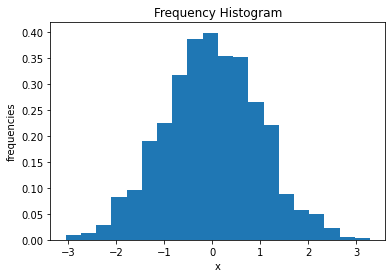

In [7]:
n_samples = 1000
mu = 0
sigma=1
samples =  np.random.normal(mu, sigma, n_samples)

plt.hist(samples, bins=20, density=True)
plt.xlabel('x')
plt.ylabel('frequencies')
plt.title('Frequency Histogram')

Text(0.5, 1.0, 'Frequency Histogram')

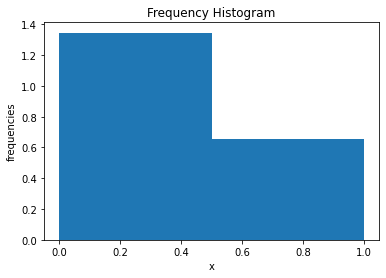

In [11]:
n_samples = 1000
p = 0.33
samples =  np.random.binomial(1, p, n_samples)

plt.hist(samples, bins=2, density=True)
plt.xlabel('x')
plt.ylabel('frequencies')

plt.title('Frequency Histogram')

In [100]:
# data
n_samples = 1000

sample_A =  np.random.normal(0, 1, 300)
sample_B =  np.random.normal(3, 1, 100)

samples = np.concatenate((sample_A, sample_B))

In [101]:
# parameters
estimated_sigma_A = np.random.rand(1)
estimated_sigma_B = np.random.rand(1)

estimated_mu_A = np.random.rand(1)
estimated_mu_B = np.random.rand(1)

p = np.random.rand(1)
estimated_p_A = p
estimated_p_B = 1 - p

In [102]:
# functions
def pdf_gaussian(x, mu, sigma):
  return np.exp(-1/2 * np.power((x - mu)/sigma, 2))/(sigma * np.sqrt(2*np.pi))

def expected_membership_value_A(x):
  Pa = pdf_gaussian(x, estimated_mu_A, estimated_sigma_A)
  Pb = pdf_gaussian(x, estimated_mu_B, estimated_sigma_B)

  return Pa*estimated_p_A / (Pa*estimated_p_A + Pb*estimated_p_B)

def expected_membership_value_B(x):
  Pa = pdf_gaussian(x, estimated_mu_A, estimated_sigma_A)
  Pb = pdf_gaussian(x, estimated_mu_B, estimated_sigma_B)

  return Pb*estimated_p_B / (Pa*estimated_p_A + Pb*estimated_p_B)

$P(A|x_i) = P(x_i|A)p_A \div (P(x_i|A)p_A + P(x_i|B)p_B)$

In [103]:
# ME loop
for i in range(100):
  # 1. Expectation Step
  # compute membership weights
  memberships_weights_A = expected_membership_value_A(samples)
  memberships_weights_B = expected_membership_value_B(samples)

  # 2. Maximization Step
  # compute parameters
  estimated_p_A = np.mean(memberships_weights_A)
  estimated_p_B = np.mean(memberships_weights_B)

  estimated_mu_A = np.dot(memberships_weights_A, samples) / np.sum(memberships_weights_A)
  estimated_mu_B = np.dot(memberships_weights_B, samples) / np.sum(memberships_weights_B)

  estimated_sigma_A = np.sqrt(np.dot(memberships_weights_A, np.power(samples - estimated_mu_A, 2)) / np.sum(memberships_weights_A))
  estimated_sigma_B = np.sqrt(np.dot(memberships_weights_B, np.power(samples - estimated_mu_B, 2)) / np.sum(memberships_weights_B))

  # print("==== {} ====".format(i))
print(estimated_p_A, estimated_p_B)
print(estimated_mu_A, estimated_mu_B)
print(estimated_sigma_A, estimated_sigma_B)

0.734892495838499 0.265107504161501
-0.2644507594201043 3.1518057213692092
0.9620227955858169 0.9339072764366907
